# A. Data Analysis with Pandas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Reading from clinical.tsv file to a dataframe
cancer = pd.read_csv("clinical.tsv", sep='\t')
# Replacing "'--" values with NaN
cancer.replace(["'--"] , np.nan, inplace=True)
# Dropping columns with all NaN values
cancer.dropna(axis=1, inplace=True,how='all')
cancer

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,...,prior_treatment,progression_or_recurrence,secondary_gleason_grade,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,02f5ae33-a563-4ecb-9e33-dfa500a44931,TCGA-A8-A093,TCGA-BRCA,61,-22373,NaN,not reported,female,not reported,Alive,...,No,not reported,NaN,"Breast, NOS",Not Reported,"Breast, NOS",not reported,2009,yes,"Radiation Therapy, NOS"
1,02f5ae33-a563-4ecb-9e33-dfa500a44931,TCGA-A8-A093,TCGA-BRCA,61,-22373,NaN,not reported,female,not reported,Alive,...,No,not reported,NaN,"Breast, NOS",Not Reported,"Breast, NOS",not reported,2009,yes,"Pharmaceutical Therapy, NOS"
2,18b8ad7f-0f39-4853-ae13-5b13aa5e6f7d,TCGA-V1-A9OT,TCGA-PRAD,61,-22630,NaN,not hispanic or latino,male,white,Alive,...,No,not reported,Pattern 3,Prostate gland,No,Prostate gland,not reported,NaN,no,"Radiation Therapy, NOS"
3,18b8ad7f-0f39-4853-ae13-5b13aa5e6f7d,TCGA-V1-A9OT,TCGA-PRAD,61,-22630,NaN,not hispanic or latino,male,white,Alive,...,No,not reported,Pattern 3,Prostate gland,No,Prostate gland,not reported,NaN,no,"Pharmaceutical Therapy, NOS"
4,6696cf88-3c43-482c-aabb-f1ea5cf565aa,TCGA-QS-A5YR,TCGA-UCEC,61,-22372,NaN,not hispanic or latino,female,black or african american,Alive,...,No,not reported,NaN,Endometrium,No,Endometrium,not reported,2012,no,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18957,a6cda2a0-21d9-4b72-a4c5-de1142d7ddb8,TCGA-14-1043,TCGA-GBM,61,-22392,24,not reported,male,white,Dead,...,No,not reported,NaN,"Brain, NOS",Not Reported,"Brain, NOS",not reported,2004,yes,"Radiation Therapy, NOS"
18958,fb79c491-7b01-42ae-8369-8364e442e31b,TCGA-44-2665,TCGA-LUAD,55,-20349,NaN,not hispanic or latino,female,white,Alive,...,No,not reported,NaN,"Upper lobe, lung",No,"Upper lobe, lung",not reported,2009,yes,"Pharmaceutical Therapy, NOS"
18959,fb79c491-7b01-42ae-8369-8364e442e31b,TCGA-44-2665,TCGA-LUAD,55,-20349,NaN,not hispanic or latino,female,white,Alive,...,No,not reported,NaN,"Upper lobe, lung",No,"Upper lobe, lung",not reported,2009,no,"Radiation Therapy, NOS"
18960,c95ed407-bcc2-44aa-bc59-bf7549f2d665,TCGA-FV-A23B,TCGA-LIHC,70,-25788,1852,not hispanic or latino,female,white,Dead,...,No,not reported,NaN,Liver,No,Liver,not reported,2005,no,"Radiation Therapy, NOS"


In [3]:
# Filtering with chosen columns

cancer = cancer.filter(['case_submitter_id', 'age_at_index', 'days_to_death', 'gender', 'race', 'vital_status', 
                'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'ajcc_pathologic_stage', 
                'icd_10_code', 'primary_diagnosis', 'prior_malignancy', 'prior_treatment', 
                'site_of_resection_or_biopsy', 'synchronous_malignancy', 'tissue_or_organ_of_origin', 
                'year_of_diagnosis', 'treatment_type'])

In [4]:
# Removing columns with any NaN values
rows_start = len(cancer)
cancer.dropna(inplace=True)
rows_end = len(cancer)
print ("Dropped column count :" , rows_start-rows_end)

Dropped column count : 16402


In [5]:
# Removing columns with values "not reported" or "Not Reported"

rows_start = len(cancer)
cancer = cancer[(~cancer.eq("not reported").any(1)) & (~cancer.eq("Not Reported").any(1))]
rows_end= len(cancer)
print ("Dropped column count :" , rows_start-rows_end)

Dropped column count : 506


In [6]:
# Duplicate case_submitter_id's deleted
cancer = cancer.drop_duplicates(subset = 'case_submitter_id' )
# Setting case_submitter_id as index of dataframe
cancer = cancer.set_index('case_submitter_id')
cancer.head()

,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
case_submitter_id,,,,,,,,,,,,,,,,,,
TCGA-CV-5970,59,406,male,white,Dead,1950,2010,21890,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2009,"Radiation Therapy, NOS"
TCGA-BA-4074,69,462,male,white,Dead,1934,2004,25282,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2003,"Radiation Therapy, NOS"
TCGA-CN-A642,57,82,male,white,Dead,1955,2012,21011,Stage IVB,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2012,"Radiation Therapy, NOS"
TCGA-2J-AABA,55,607,male,white,Dead,1957,2013,20133,Stage IIB,C25.0,"Infiltrating duct carcinoma, NOS",no,No,Head of pancreas,No,Head of pancreas,2012,"Radiation Therapy, NOS"
TCGA-62-8398,55,444,male,white,Dead,1952,2008,20197,Stage IIIA,C34.3,Adenocarcinoma with mixed subtypes,no,No,"Lower lobe, lung",No,"Lower lobe, lung",2007,"Pharmaceutical Therapy, NOS"


In [7]:
# Print column and row count

print("Row count:" , len(cancer) , "\nColumn count:", len(cancer.columns))

Row count: 1027 
Column count: 18


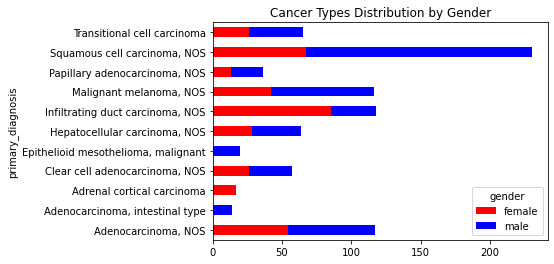

In [8]:

# The distribution of cancer types involving at least 10 patients by gender was printed out as a horizontally stacked column chart.

cancer_gender = cancer.groupby(['primary_diagnosis']).gender.value_counts()

cancer_gender = cancer_gender[cancer_gender > 10]

cancer_gender.unstack('gender').plot.barh(stacked=True , title = "Cancer Types Distribution by Gender" , color=("red","blue"))
plt.show()



In [9]:
# The number of patients with cancer type was listed in descending order.

cancer_kind = cancer.groupby('primary_diagnosis').size().sort_values(ascending=False)
cancer_kind

primary_diagnosis
Squamous cell carcinoma, NOS                                 230
Infiltrating duct carcinoma, NOS                             118
Adenocarcinoma, NOS                                          117
Malignant melanoma, NOS                                      116
Transitional cell carcinoma                                   65
Hepatocellular carcinoma, NOS                                 64
Clear cell adenocarcinoma, NOS                                57
Papillary adenocarcinoma, NOS                                 36
Epithelioid mesothelioma, malignant                           29
Adrenal cortical carcinoma                                    25
Adenocarcinoma with mixed subtypes                            16
Adenocarcinoma, intestinal type                               16
Tubular adenocarcinoma                                        15
Cholangiocarcinoma                                            15
Mesothelioma, biphasic, malignant                             11
Carcino

In [10]:
# Cancer type with the highest number of patients
cancer_kind.head(1)

primary_diagnosis
Squamous cell carcinoma, NOS    230
dtype: int64

In [11]:
# The age distribution of the cancer type with the highest number of patients sorted in descending order.

cancer_group = cancer.groupby('primary_diagnosis')
cancer_group = cancer_group.get_group('Squamous cell carcinoma, NOS')
cancer_groupMax = cancer_group.age_at_index.value_counts().sort_values(ascending=False)
cancer_groupMax

73    12
67    12
60    10
74    10
65    10
69     9
79     8
59     8
64     8
49     7
57     7
55     7
58     7
75     6
76     6
66     6
71     6
80     6
77     5
53     5
62     5
61     5
87     5
78     5
70     5
51     5
63     4
48     4
68     3
56     3
82     3
81     3
40     2
47     2
85     2
72     2
38     2
50     2
90     1
32     1
54     1
45     1
24     1
52     1
83     1
34     1
41     1
88     1
44     1
84     1
29     1
Name: age_at_index, dtype: int64

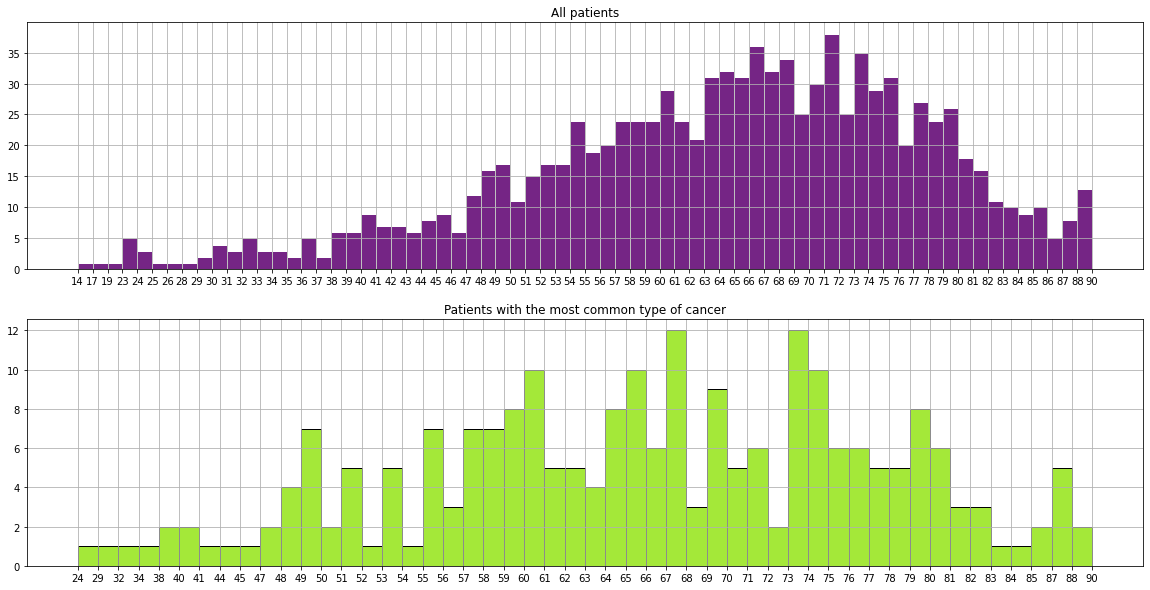

In [12]:
# Age distributions of all patients and patients with the most common type of cancer are plotted as histogram graphs in one figure

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

allfig = cancer.age_at_index.sort_values().hist(bins = 68,color='#752585',edgecolor = 'w',figsize=(20,10),ax=ax1).set_title('All patients')

cancer_group = cancer.groupby('primary_diagnosis')
cancer_groupMax = cancer_group.get_group('Squamous cell carcinoma, NOS')

maxfig = cancer_groupMax.age_at_index.sort_values().hist(bins = 50,color='#A4E839',edgecolor = 'k',figsize=(20,10),ax=ax2).set_title('Patients with the most common type of cancer')

In [13]:
# Printing the cancer type with the highest average life expectancy.

cancer['days_to_death'] = cancer['days_to_death'].astype(float)
cancer_dd = cancer
cancer_dd.groupby(['primary_diagnosis'])['days_to_death'].value_counts()
cancer_dd.groupby(['primary_diagnosis'])['days_to_death'].mean()
cancer_ddMean = cancer_dd.groupby(['primary_diagnosis'])['days_to_death'].agg('mean').sort_values(ascending=False)
cancer_ddMean.head(1)

primary_diagnosis
Amelanotic melanoma    5237.0
Name: days_to_death, dtype: float64

<AxesSubplot:xlabel='age_at_diagnosis', ylabel='days_to_death'>

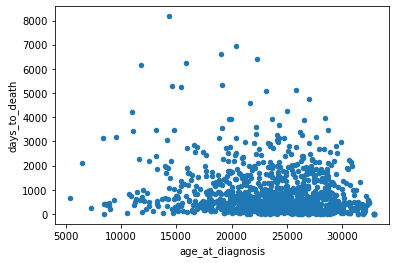

In [14]:
# Drawing a scatterplot showing the relationship between the age at diagnosis of cancer (age_at_diagnosis) and the patient's remaining days (days_to_death).
cancer['age_at_diagnosis'] = cancer['age_at_diagnosis'].astype(float)
cancer.plot.scatter(x='age_at_diagnosis', y = 'days_to_death')

In [15]:
# Reading exposure.tsv file to a dataframe under the same conditions with the previous one
exposure = pd.read_csv('exposure.tsv',sep='\t')
exposure.replace(["'--","Not Reported"] , np.nan,inplace=True)

# Setting case_submitter_id as index of dataframe
exposure = exposure.set_index('case_submitter_id')
exposure

,case_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,bmi,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-A8-A093,02f5ae33-a563-4ecb-9e33-dfa500a44931,TCGA-BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-V1-A9OT,18b8ad7f-0f39-4853-ae13-5b13aa5e6f7d,TCGA-PRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-QS-A5YR,6696cf88-3c43-482c-aabb-f1ea5cf565aa,TCGA-UCEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-B5-A11J,027b2a29-2fad-4ca8-a7cd-eb913d0205f8,TCGA-UCEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-23-1809,bc3e0b74-ea09-46a5-9f61-16bd15ffd883,TCGA-OV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A8-A095,29df128d-ace2-40cf-88ee-3f6f2170f159,TCGA-BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-D5-6920,dc22eba5-6fb7-4875-b30a-99fa00758301,TCGA-COAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-14-1043,a6cda2a0-21d9-4b72-a4c5-de1142d7ddb8,TCGA-GBM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Dropping colums with NaN values
exposure.dropna(axis=1, inplace=True,how='all') # if all of the values are NaN
exposure.dropna(inplace=True) # if any of them is null
exposure

,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,
TCGA-2J-AABI,2aaf212f-000a-4a9d-8a4a-198fa94f491e,TCGA-PAAD,Yes,2.3013698630136985,42.0,31.0
TCGA-BB-A6UM,03c3ae62-d0aa-412e-bd3c-4577fc9f919c,TCGA-HNSC,No,5.7534246575342465,105.0,35.0
TCGA-D6-6825,42bc2336-2408-441a-83b9-aadc9700f750,TCGA-HNSC,Yes,16.438356164383563,300.0,54.0
TCGA-CR-7376,b3bed685-e9db-436b-9938-2b8a0a0d5b83,TCGA-HNSC,Yes,2.958904109589041,54.0,18.0
TCGA-CV-7097,9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849315068493,64.0,32.0
...,...,...,...,...,...,...
TCGA-FB-AAPQ,ecdd0e44-0add-4a08-a3f8-ab2f51df7afd,TCGA-PAAD,No,1.36986301369863,25.0,25.0
TCGA-CV-6952,7ed006e8-461f-4664-bfff-55fa6812743c,TCGA-HNSC,Yes,1.643835616438356,30.0,30.0
TCGA-HZ-A8P0,98f1d0eb-0977-4f53-a3b1-e6875a34c27b,TCGA-PAAD,Yes,1.095890410958904,20.0,20.0


In [17]:
# Printing the column and row count
rows = len(exposure)
columns = len(exposure.columns)
print ("Row count :" , rows, "\nColumn count: ", columns)

Row count : 136 
Column count:  6


In [18]:
# Cancer and exposure dataframes are merged into a new df

cancer_exposure = pd.merge(cancer,exposure,on = "case_submitter_id")
cancer_exposure.head()

,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,...,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-7097,53,385.0,male,white,Dead,1949,2003,19382.0,Stage II,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",2002,"Radiation Therapy, NOS",9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849315068493,64.0,32.0
TCGA-CV-6961,61,76.0,male,white,Dead,1938,1999,22532.0,Stage II,C02.9,...,No,"Tongue, NOS",1999,"Radiation Therapy, NOS",4075717b-2240-4842-a00a-0c4dbcb910c4,TCGA-HNSC,Yes,3.6164383561643834,66.0,33.0
TCGA-CV-A45Y,61,2703.0,male,american indian or alaska native,Dead,1939,2007,22442.0,Stage IVA,C32.9,...,No,"Larynx, NOS",2000,"Radiation Therapy, NOS",468061c2-0acb-4f67-a357-99ccbd81a8b7,TCGA-HNSC,Yes,2.136986301369863,39.0,39.0
TCGA-CV-7568,48,927.0,female,white,Dead,1947,1997,17670.0,Stage IVA,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",1995,"Pharmaceutical Therapy, NOS",fa2d4258-3ee4-4d53-8ef2-9700b5cf38d6,TCGA-HNSC,No,1.917808219178082,35.0,35.0
TCGA-CQ-5325,65,654.0,male,white,Dead,1942,2008,23833.0,Stage I,C02.9,...,No,"Tongue, NOS",2007,"Radiation Therapy, NOS",408c5d54-7888-4955-8386-bf8819b48a6c,TCGA-HNSC,Yes,2.684931506849315,49.0,49.0


In [19]:
# Patients with a history of alcoholism and smoking more than 3 cigarettes per day were selected.

ce_alcohol = cancer_exposure[cancer_exposure.alcohol_history == 'Yes']
ce_alcohol = ce_alcohol[ce_alcohol.cigarettes_per_day > '3']
ce_alcohol

,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,...,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-7097,53,385.0,male,white,Dead,1949,2003,19382.0,Stage II,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",2002,"Radiation Therapy, NOS",9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849315068493,64.0,32.0
TCGA-CV-6961,61,76.0,male,white,Dead,1938,1999,22532.0,Stage II,C02.9,...,No,"Tongue, NOS",1999,"Radiation Therapy, NOS",4075717b-2240-4842-a00a-0c4dbcb910c4,TCGA-HNSC,Yes,3.6164383561643834,66.0,33.0
TCGA-P3-A6SX,67,1430.0,male,white,Dead,1938,2008,24715.0,Stage III,C09.9,...,No,"Tonsil, NOS",2005,"Radiation Therapy, NOS",220d75ae-c94b-473a-a988-ac40c15fa219,TCGA-HNSC,Yes,5.47945205479452,100.0,50.0
TCGA-CV-7434,64,218.0,male,white,Dead,1935,1999,23465.0,Stage IVA,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",1999,"Radiation Therapy, NOS",63b50e1c-7948-464f-bff1-8e0e5daafcc5,TCGA-HNSC,Yes,4.383561643835616,80.0,40.0
TCGA-IB-AAUQ,50,183.0,male,white,Dead,1963,2013,18315.0,Stage IIB,C25.2,...,No,Tail of pancreas,2013,"Pharmaceutical Therapy, NOS",afe89625-b355-454d-8c0b-b4161edd69f8,TCGA-PAAD,Yes,3.780821917808219,69.0,23.0
TCGA-CV-7418,62,789.0,male,black or african american,Dead,1934,1998,22805.0,Stage IVA,C32.9,...,No,"Larynx, NOS",1996,"Pharmaceutical Therapy, NOS",20ad4ac0-6a87-461f-83a5-fded51bf821a,TCGA-HNSC,Yes,3.287671232876712,60.0,39.0
TCGA-CV-7422,60,1037.0,female,white,Dead,1937,1999,22098.0,Stage IVA,C32.9,...,No,"Larynx, NOS",1997,"Radiation Therapy, NOS",2e73e016-61ff-4f23-9ca9-fd48d9050d82,TCGA-HNSC,Yes,4.383561643835616,80.0,40.0


Text(0.5, 1.0, 'Percentages of tissue/organ where cancer first occured')

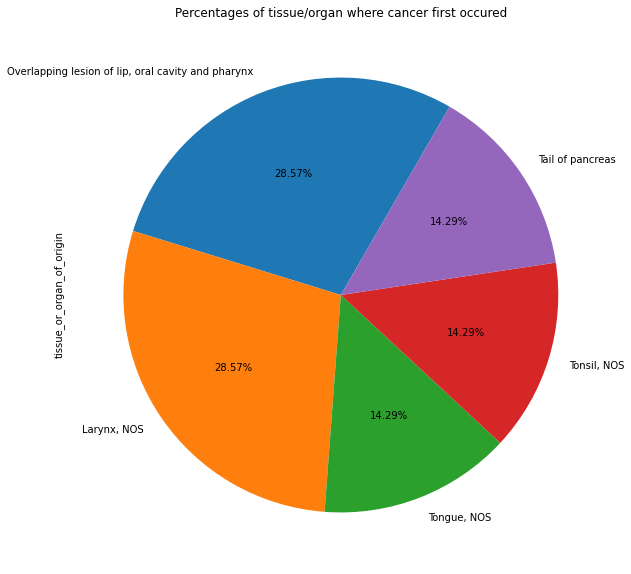

In [20]:
# The percentages of tissue/organ where cancer first occured were shown in the pie chart

plt.figure(figsize=(10,10)) 
ce_alcohol['tissue_or_organ_of_origin'].value_counts().plot.pie(autopct='%1.2f%%',startangle=60) 
plt.title("Percentages of tissue/organ where cancer first occured")                      